In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [18]:
from keras.models import load_model
m=load_model('models/segmentation.hdf5')


In [15]:
video = cv2.VideoCapture('data/comma_ai/test.mp4')
video.set(1, 7000)

True

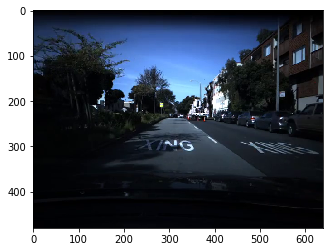

In [16]:
frame_1 = cv2.cvtColor(video.read()[1], cv2.COLOR_BGR2RGB)
frame_2 = cv2.cvtColor(video.read()[1], cv2.COLOR_BGR2RGB)
frame_3 = cv2.cvtColor(video.read()[1], cv2.COLOR_BGR2RGB)
frame_4 = cv2.cvtColor(video.read()[1], cv2.COLOR_BGR2RGB)
plt.imshow(frame_4)

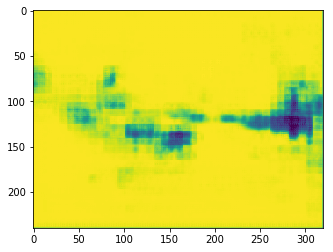

In [23]:
l = m.predict(np.array([cv2.cvtColor(frame_4, cv2.COLOR_BGR2GRAY).reshape(480, 640, 1)]))
plt.imshow(l[0])

In [4]:
def flow_vectors(flow, scale=10, resolution=0.1):
    xloc = scale*np.tile(
        np.arange(flow.shape[1]*resolution) / resolution, 
        (int(flow.shape[0]*resolution) ,1)
    )
    yloc = scale*np.matrix.transpose(
        np.tile(
            np.arange(flow.shape[0]*resolution) / resolution, 
            (int(flow.shape[1]*resolution), 1)
        )
    )
    flow = cv2.resize(flow, (0,0), fx=resolution, fy=resolution)
    return plt.quiver(xloc, yloc, flow[:, :, 0], flow[:, :, 1])
    
def flow_colors(flow):
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,1] = 255
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    return plt.imshow(cv2.cvtColor(hsv.astype(np.uint8),cv2.COLOR_HSV2RGB))

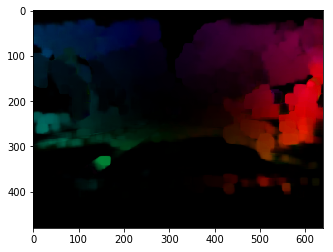

In [5]:
hsv = np.full((480, 640, 3), 255)
flow = cv2.calcOpticalFlowFarneback(
    cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY), 
    cv2.cvtColor(frame_2, cv2.COLOR_BGR2GRAY),
    None, 0.5, 3, 15, 3, 5, 1.2, 0
)

flow_colors(flow)    

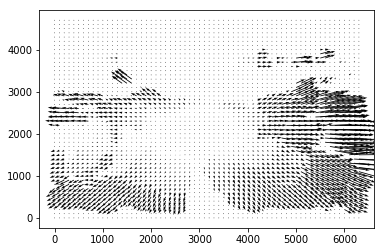

In [6]:
flow_vectors(flow)

In [7]:
np.matrix.transpose(yloc)

NameError: name 'yloc' is not defined